In [24]:
from scipy import signal
from sympy import *
import matplotlib.pyplot as plt
import math as m
#from splane import pzmap, grpDelay, bodePlot
import numpy as np

# Resolucion 1R_SControl_2021_02_12:

# Ejercicio 1)
a) La variable a controlar debe ser la presion del liquido en nuestro sensor ya que es la variable que re-alimentamos para abrir o cerrar la valvula.<br>
b)En regimen permanente el valor dependera de la altura(H), la densidad del liquido($\delta$), la gravedad(g) y las demas constantes del sistema.<br>
c)<img src="./Bloques 1.png" align="center" width="80%" />
d)Medimos el error a la salida del sumador: $E_{(S)}=R_{(S)}*\frac{1}{1+G_{(S)}}$
<img src="./Bloques 2.png" align="center" width="80%" />

## Ejercicio 2)


In [25]:
S= symbols('S')

####Declaro las matrices
A=Matrix(([-1,-3],
          [5,-3]))
B=Matrix(([3],
          [0]))
C=Matrix(([0,1],))
D=Matrix(([0],))
####Inspeccion visual de las matrices
print("A=")
pprint(A)
print("B=")
pprint(B)
print("C=")
pprint(C)
print("D=")
pprint(D)
###Trabajo las matrices para conseguir tf
aux=S*np.identity(2) - A
auxinv= aux.inv('ADJ')
### Verificacion del trabajo intermedio, medio innecesario
#print("aux=")
#pprint(aux)
#print("aux inv=")
#pprint(auxinv)
#### Finalmente obtengo Tf
tf=C * auxinv * B + D
print("tf=")
pprint(tf[0])
###Aplico teorema del valor final
expr = Limit(tf[0], S, 0)
pprint(expr)
pprint(expr.doit())

print("Paso la tf al tiempo")
t = symbols('t')
#w = symbols('w', real = True)
expression = tf[0]
print("TF[0]=")
inverse_laplace_transform(expression, S, t)

A=
⎡-1  -3⎤
⎢      ⎥
⎣5   -3⎦
B=
⎡3⎤
⎢ ⎥
⎣0⎦
C=
[0  1]
D=
[0]
tf=
         15        
───────────────────
     2             
1.0⋅S  + 4.0⋅S + 18
     ⎛         15        ⎞
 lim ⎜───────────────────⎟
S─→0⁺⎜     2             ⎟
     ⎝1.0⋅S  + 4.0⋅S + 18⎠
5/6
Paso la tf al tiempo
TF[0]=


4.00891862868636*exp(-2.0*t)*sin(3.74165738677394*t)*Heaviside(t)

Numerador=
[[0.0000000e+00 4.4408921e-16 1.5000000e+01]]
Denominador=
[ 1.  4. 18.]


F:\Anaconda\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


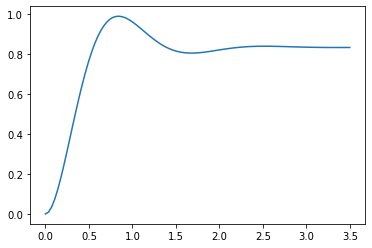

In [26]:
#### Version scipy
### Declaro las matrices
A = [[-1, -3], [5, -3]]
B = [[3], [0]]  # 2-D column vector
C = [[0, 1]]    # 2-D row vector
D = 0
#### Paso de Space State a Tf
(system)=signal.ss2tf(A, B, C, D)
print('Numerador=')
pprint(system[0])
print('Denominador=')
pprint(system[1])
t, y = signal.step(system)
import matplotlib.pyplot as plt
plt.plot(t, y)

In [27]:
E_R=(S**2+4*S+3)/(S**2+4*S+18)*1/S
C_N=4/(S*(S**2+4*S+18))
E_T=E_R+C_N
pprint(simplify(E_T))
###Aplico teorema del valor final
expr = Limit(E_T*S, S, 0)
pprint(expr)
print("E_T=")
pprint(expr.doit())

    2            
   S  + 4⋅S + 7  
─────────────────
  ⎛ 2           ⎞
S⋅⎝S  + 4⋅S + 18⎠
     ⎛  ⎛    2                                ⎞⎞
     ⎜  ⎜   S  + 4⋅S + 3             4        ⎟⎟
 lim ⎜S⋅⎜───────────────── + ─────────────────⎟⎟
S─→0⁺⎜  ⎜  ⎛ 2           ⎞     ⎛ 2           ⎞⎟⎟
     ⎝  ⎝S⋅⎝S  + 4⋅S + 18⎠   S⋅⎝S  + 4⋅S + 18⎠⎠⎠
E_T=
7/18


### 2-d)
Ecuaciones:
$$X_1=R-H*Y$$
$$X_2=N+G_1*X_1$$
$$Y=X_2*G_2*G_3$$
Al reemplazar y despejar resulta:<br>
$$Y=N*\frac{G_2*G_3}{1+H*G_1*G_2*G_3}+R*\frac{G_1*G_2*G_3}{1+H*G_1*G_2*G_3}$$
<img src="./Capture2.PNG" align="center" width="80%" />

In [28]:
N, R= symbols('N,R')
G_1=3*(S+2)/S
G_2=5/(S+1)
G_3=1/(S+3)
H=1
cte=(G_2*G_3)/(1 + H*G_1*G_2*G_3)
Y=N*cte + R*G_1*cte
###Aplico teorema del valor final
expr3 = Limit(Y*S, S, 0)
pprint(expr3)
print("Y=")
pprint(expr3.doit())

     ⎛  ⎛                  5⋅N                                   5⋅R⋅(3⋅S + 6)
 lim ⎜S⋅⎜─────────────────────────────────────── + ───────────────────────────
S─→0⁺⎜  ⎜⎛       5⋅(3⋅S + 6)   ⎞                     ⎛       5⋅(3⋅S + 6)   ⎞  
     ⎜  ⎜⎜1 + ─────────────────⎟⋅(S + 1)⋅(S + 3)   S⋅⎜1 + ─────────────────⎟⋅(
     ⎝  ⎝⎝    S⋅(S + 1)⋅(S + 3)⎠                     ⎝    S⋅(S + 1)⋅(S + 3)⎠  

              ⎞⎞
──────────────⎟⎟
              ⎟⎟
S + 1)⋅(S + 3)⎟⎟
              ⎠⎠
Y=
0


## Ejercicio 3)
Dada la ecuacion:<br>
$$y^{,,,}+ 3*y^{,,}+8*y^{,}+y=u$$
Puedo plantear:
$$y^{,,,,}+ a_3*y^{,,,}+a_2*y^{,,}+a_1*y^{,}+a_0*y=u\rightarrow$$
$$S^{4}*Y+ a_3*S^{3}*Y+a_2*S^{2}*Y+a_1*S*Y+a_0*Y=U\rightarrow$$
$$\frac{Y}{U}=\frac{1}{S^{4}+ a_3*S^{3}+a_2*S^{2}+a_1*S+a_0}\rightarrow$$
<img src="./Captura1.PNG" align="center" width="80%" />
Entonces con estos concepto desarrollados y el concepto de las matrices de estado obtenemos la respuesta al punto a:<br>
## a)
$$X_{punto}=A*X+B*U$$
$$Y=C*X+D*U$$
$$A=\begin{bmatrix}
0 & 1 & 0\\
0 & 0 & 1\\
-a_0 & -a_1 & -a_2
\end{bmatrix}$$
$$B=\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}$$
$$C=\begin{bmatrix}
1 & 0 & 0\\
\end{bmatrix}$$
$$D=0$$
## b)
Para la transferencia nos volvemos a poya en los conceptos anteriores y resulta:<br>
$$\frac{Y_{(S)}}{U_{(S)}}=\frac{1}{S^{3}+3*S^{2}+8*S+1}$$
## c)
**Cuadro del apunte:"SCn.txpr.error.reg.rv10.pdf"**<br>
$$E_{(S)}=R_{(S)}*\frac{1}{1+G_{(S)}}$$
$$K_p=\lim_{S\to 0} G(S)$$
Viendo la $G_{(S)}$ que es de tipo 0 ya que su limite da un valor finito y la entrada un escalon($\frac{1}{S}$) podemos determinar que es un valor finito.
$$\lim_{S\to 0} \frac{1}{S^0 + S^0*K_p}=\frac{1}{1+K_p}$$

In [38]:
####Declaro las matrices
A=Matrix(([0,1,0],
          [0,0,1],
          [-1,-8,-3]))
B=Matrix(([0],
          [0],
          [1]))
C=Matrix(([1,0,0],))
D=Matrix(([0],))
####Inspeccion visual de las matrices
print("A=")
pprint(A)
print("B=")
pprint(B)
print("C=")
pprint(C)
print("D=")
pprint(D)
###Trabajo las matrices para conseguir tf
aux=S*np.identity(3) - A
auxinv= aux.inv('ADJ')
### Verificacion del trabajo intermedio, medio innecesario
#print("aux=")
#pprint(aux)
#print("aux inv=")
#pprint(auxinv)
#### Finalmente obtengo Tf
tf=C * auxinv * B + D
print("tf=")
pprint(tf[0])
###Aplico teorema del valor final
expr = Limit(tf[0], S, 0)
pprint(expr)
pprint(expr.doit())

print("Paso la tf al tiempo")
t = symbols('t')
#w = symbols('w', real = True)
expression = tf[0]
print("TF[0]=")
inverse_laplace_transform(expression, S, t)

A=
⎡0   1   0 ⎤
⎢          ⎥
⎢0   0   1 ⎥
⎢          ⎥
⎣-1  -8  -3⎦
B=
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦
C=
[1  0  0]
D=
[0]
tf=
             1             
───────────────────────────
     3        2            
1.0⋅S  + 3.0⋅S  + 8.0⋅S + 1
                  1             
 lim ───────────────────────────
S─→0⁺     3        2            
     1.0⋅S  + 3.0⋅S  + 8.0⋅S + 1
1
Paso la tf al tiempo
TF[0]=


-0.0760391301181349*exp(-1.43441501017074*t)*sin(2.35926878570139*t)*Heaviside(t) - 0.137653888547033*exp(-1.43441501017074*t)*cos(2.35926878570139*t)*Heaviside(t) + 0.137653888547033*exp(-0.131169979658525*t)*Heaviside(t)